# Customer Satisfaction Dataset

In [1]:
import pandas as pd
from sklearn.feature_selection import mutual_info_regression
import seaborn as sns
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

**Step-1:** Import the dataset

In [2]:
df = pd.read_csv("/kaggle/input/cs1234/Santander Customer Satisfaction_train.csv")
print(df.shape)
target_column = 0
# Check if all features are numeric
features_df = df.drop(columns=target_column) if target_column else df
all_numeric = all(pd.api.types.is_numeric_dtype(features_df[col]) for col in features_df.columns)
print("All features numeric:", all_numeric)
     
df.head()

(76020, 371)


All features numeric: True


,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0
3,8,2,37,0.0,195.0,195.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0
4,10,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0


**Step-2:** Handling the Null values in the dataset

In [3]:
df.isnull().sum()

ID                         0
var3                       0
var15                      0
imp_ent_var16_ult1         0
imp_op_var39_comer_ult1    0
                          ..
saldo_medio_var44_hace3    0
saldo_medio_var44_ult1     0
saldo_medio_var44_ult3     0
var38                      0
TARGET                     0
Length: 371, dtype: int64

In [4]:
#Drop the null values if you have more than 30% of Null
df.dropna(axis=1, thresh=0.7*len(df), inplace=True)

#Fill the null values
df = df.fillna(df.median())

In [5]:
df.head()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0
3,8,2,37,0.0,195.0,195.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0
4,10,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0


**Step-3:** Splitting the Dataset

In [6]:
X = df.drop('TARGET', axis=1)
y = df['TARGET']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

**Step-4:** Applying Constant Feature

In [7]:
constant_feature = [col for col in X_train.columns if X_train[col].nunique == 1]
print(constant_feature)

[]


Step-5: Quasi Constant Feature

In [8]:
quasi_constant_feature = []
threshold = 0.98

for col in X_train.columns:
    freq = X_train[col].value_counts(normalize=True).iloc[0]
    if freq >= threshold:
        quasi_constant_feature.append(col)

print("quasi_constant_feature: ", quasi_constant_feature)
print("\nTotal: ", len(quasi_constant_feature))

X_train = X_train.drop(columns=quasi_constant_feature, axis=1)
X_test = X_test.drop(columns=quasi_constant_feature, axis=1)

quasi_constant_feature:  ['imp_op_var40_comer_ult1', 'imp_op_var40_comer_ult3', 'imp_op_var40_efect_ult1', 'imp_op_var40_efect_ult3', 'imp_op_var40_ult1', 'imp_sal_var16_ult1', 'ind_var1_0', 'ind_var1', 'ind_var2_0', 'ind_var2', 'ind_var6_0', 'ind_var6', 'ind_var13_largo_0', 'ind_var13_largo', 'ind_var13_medio_0', 'ind_var13_medio', 'ind_var14', 'ind_var17_0', 'ind_var17', 'ind_var18_0', 'ind_var18', 'ind_var19', 'ind_var20_0', 'ind_var20', 'ind_var27_0', 'ind_var28_0', 'ind_var28', 'ind_var27', 'ind_var29_0', 'ind_var29', 'ind_var30_0', 'ind_var31_0', 'ind_var31', 'ind_var32_cte', 'ind_var32_0', 'ind_var32', 'ind_var33_0', 'ind_var33', 'ind_var34_0', 'ind_var34', 'ind_var40_0', 'ind_var40', 'ind_var41', 'ind_var39', 'ind_var44_0', 'ind_var44', 'ind_var46_0', 'ind_var46', 'num_var1_0', 'num_var1', 'num_var6_0', 'num_var6', 'num_var13_largo_0', 'num_var13_largo', 'num_var13_medio_0', 'num_var13_medio', 'num_var14', 'num_var17_0', 'num_var17', 'num_var18_0', 'num_var18', 'num_var20_0', '

**Step-6:** Duplicate Features

In [9]:
train_T = X_train.T
duplicate_features = train_T[train_T.duplicated()].index.tolist()
print(duplicate_features)
print("\nTotal Duplicate Features: ", len(duplicate_features))
X_train = X_train.drop(columns=duplicate_features, axis=1)
X_test = X_test.drop(columns=duplicate_features, axis=1)

['ind_var26', 'ind_var25', 'ind_var37', 'num_var26', 'num_var25', 'num_var37']

Total Duplicate Features:  6


**Step-7:** Correlation

In [10]:
corr_matrix = X_train.corr()
corr_threshold = 0.98
corr_pairs = set()

for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i,j] > corr_threshold):
            corr_pairs.add(corr_matrix.columns[i])

print("Correlation Features: ",corr_pairs)
print("\nTotal: ", len(corr_pairs))

X_train = X_train.drop(columns=corr_pairs, axis=1)
X_test = X_test.drop(columns=corr_pairs, axis=1)


Correlation Features:  {'num_op_var39_hace2', 'saldo_medio_var13_corto_ult3', 'ind_var13', 'saldo_medio_var12_ult3', 'saldo_var25', 'num_op_var39_efect_ult3', 'num_var12', 'num_var13_corto', 'num_op_var39_ult3', 'ind_var41_0', 'saldo_medio_var13_corto_ult1', 'ind_var13_corto', 'num_var8_0', 'num_var5', 'num_op_var39_efect_ult1', 'num_var13_corto_0', 'num_var24', 'imp_op_var39_ult1', 'num_var24_0', 'num_var35', 'imp_op_var39_efect_ult1', 'saldo_medio_var12_ult1', 'num_var45_ult3', 'num_var8', 'delta_num_aport_var13_1y3', 'num_op_var39_ult1', 'saldo_var24', 'imp_op_var39_efect_ult3'}

Total:  28


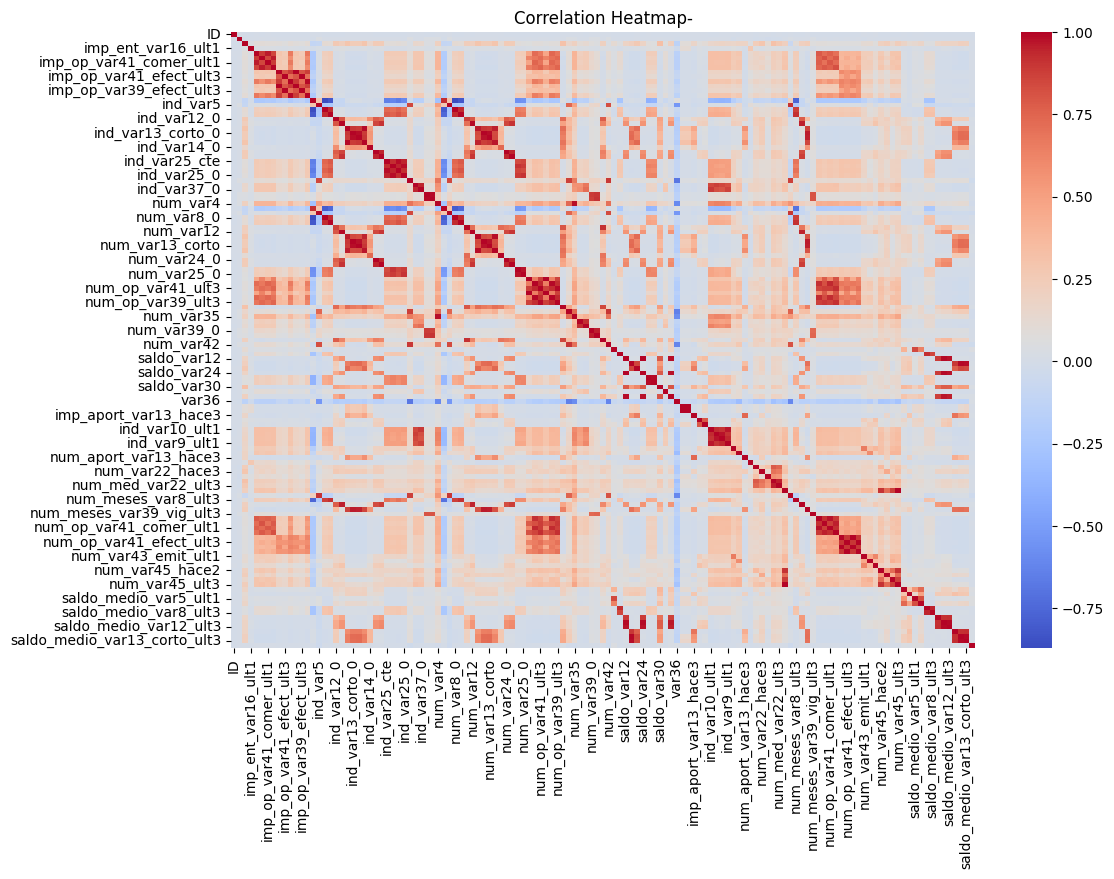

In [11]:
#Heatmap
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, annot=False, cmap="coolwarm")
plt.title("Correlation Heatmap-")
plt.show()

**Step-8:** Mututal Information Regression

In [12]:
X_train = X_train.select_dtypes(include=['number'])

mi_scores = mutual_info_regression(X_train, y_train, discrete_features=False)
mi_df = pd.Series(mi_scores, index=X_train.columns)
mi_df = mi_df.sort_values(ascending=False)


low_importance = mi_df[mi_df < 0.01].index.tolist()

print("Mututal Information: ",low_importance)
print("\nTotal: ", len(low_importance))

X_train = X_train.drop(columns=low_importance,axis=1)
X_test = X_test.drop(columns=low_importance, axis =1)

Mututal Information:  ['ind_var8', 'saldo_var42', 'num_var4', 'num_op_var41_comer_ult3', 'saldo_medio_var8_ult3', 'num_var37_0', 'num_op_var39_comer_ult1', 'ind_var8_0', 'num_var43_emit_ult1', 'num_var42', 'ind_var24_0', 'var36', 'ind_var13_corto_0', 'saldo_medio_var12_hace2', 'num_var30_0', 'num_var30', 'num_var13_0', 'ind_var26_0', 'imp_op_var41_comer_ult3', 'ind_var14_0', 'num_meses_var39_vig_ult3', 'saldo_var26', 'imp_op_var41_ult1', 'imp_trans_var37_ult1', 'num_aport_var13_hace3', 'var3', 'var38', 'num_ent_var16_ult1', 'imp_op_var41_comer_ult1', 'delta_imp_aport_var13_1y3', 'saldo_medio_var8_ult1', 'num_trasp_var11_ult1', 'ind_var13_0', 'ind_var10cte_ult1', 'saldo_var8', 'num_var42_0', 'num_var22_hace3', 'ind_var5_0', 'num_var39_0', 'ind_var37_cte', 'num_var22_hace2', 'saldo_medio_var13_corto_hace2', 'num_op_var41_efect_ult3', 'ID', 'saldo_var12', 'num_var37_med_ult2', 'num_var12_0', 'ind_var12', 'num_op_var39_comer_ult3', 'num_var45_hace3', 'imp_ent_var16_ult1', 'imp_op_var39_com

In [13]:
#Chi Square cannot be applied since the output feature is numerical

In [14]:
from sklearn.feature_selection import f_regression
import pandas as pd

# 1. Select numerical features

# 2. Compute F-statistic and p-values
f_scores, p_values = f_regression(X_train, y_train)

# 3. Wrap into a DataFrame for better understanding
anova_df = pd.DataFrame({
    'F_Score': f_scores,
    'P_Value': p_values
}, index=X_train.columns)

# 4. Sort by F-score (descending)
anova_df = anova_df.sort_values(by='F_Score', ascending=False)

# 5. Optional: remove features with weak relationship (e.g., p-value > 0.05)
insignificant_features = anova_df[anova_df['P_Value'] > 0.05].index.tolist()

print("Dropping features with weak linear relationship:", insignificant_features)
print("Total: ", len(insignificant_features))

# 6. Drop those from train and test
X_train = X_train.drop(columns=insignificant_features)
X_test = X_test.drop(columns=insignificant_features)

Dropping features with weak linear relationship: []
Total:  0


**Scaling the dataset**

In [15]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

# Training using the RandomForestClassifer

In [16]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_scaled, y_train)
y_pred = rf.predict(X_test_scaled)

print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

           0       0.96      0.99      0.98     14597
           1       0.04      0.01      0.02       607

    accuracy                           0.95     15204
   macro avg       0.50      0.50      0.50     15204
weighted avg       0.92      0.95      0.94     15204



**Evaluate the Model**

In [17]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

Accuracy: 0.9513285977374375
Precision: 0.9234119651074232
Recall: 0.9513285977374375
F1 Score: 0.936756791973708


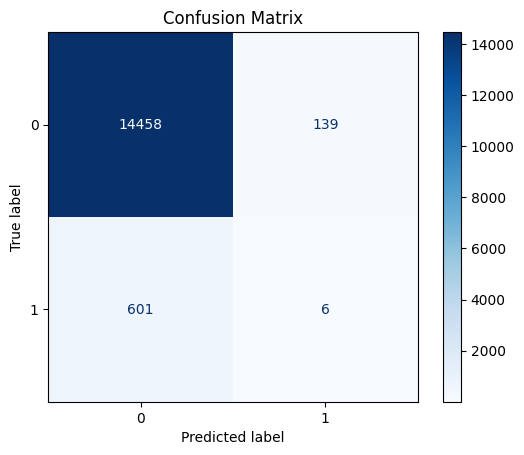

In [18]:
#confusion Matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="Blues")
plt.title("Confusion Matrix")
plt.show()


In [19]:
#Classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.96      0.99      0.98     14597
           1       0.04      0.01      0.02       607

    accuracy                           0.95     15204
   macro avg       0.50      0.50      0.50     15204
weighted avg       0.92      0.95      0.94     15204



**Feature Importance**

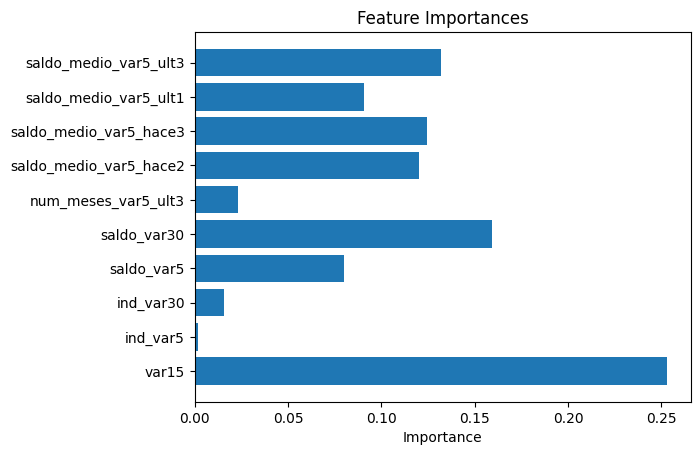

In [20]:
importances = rf.feature_importances_
features = X_train.columns
plt.barh(features, importances)
plt.xlabel('Importance')
plt.title('Feature Importances')
plt.show()

# Training using the Logistic Regression

In [21]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=500)
lr.fit(X_train_scaled, y_train)
y_pred_lr = lr.predict(X_test_scaled)

**Evaluating the Model**

In [22]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_test, y_pred_lr)
precision = precision_score(y_test, y_pred_lr, average='weighted')
recall = recall_score(y_test, y_pred_lr, average='weighted')
f1 = f1_score(y_test, y_pred_lr, average='weighted')

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

Accuracy: 0.9598132070507761
Precision: 0.9217364067973802
Recall: 0.9598132070507761
F1 Score: 0.9403895280276658


**Confusion Matrix**

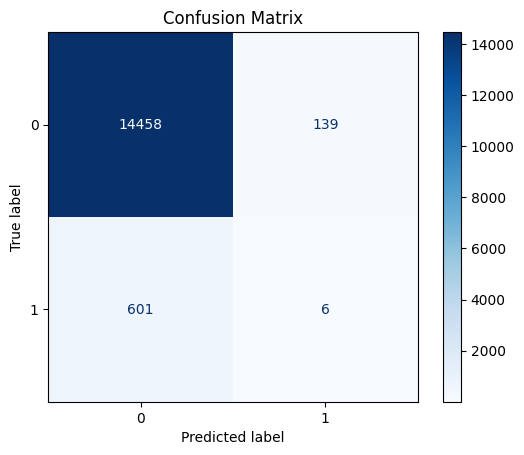

In [23]:
#confusion Matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="Blues")
plt.title("Confusion Matrix")
plt.show()


In [24]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.99      0.98     14597
           1       0.04      0.01      0.02       607

    accuracy                           0.95     15204
   macro avg       0.50      0.50      0.50     15204
weighted avg       0.92      0.95      0.94     15204



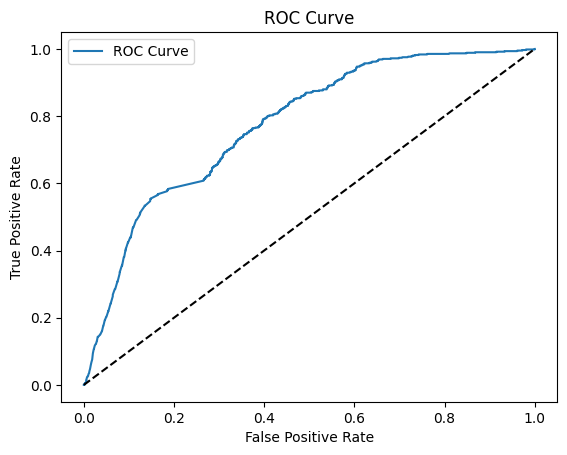

ROC AUC Score: 0.7745784350759712


In [25]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

y_proba = lr.predict_proba(X_test_scaled)[:, 1]  # probability of class 1

fpr, tpr, thresholds = roc_curve(y_test, y_proba)
plt.plot(fpr, tpr, label='ROC Curve')
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

print("ROC AUC Score:", roc_auc_score(y_test, y_proba))


In [26]:
from sklearn.metrics import log_loss
print("Log Loss:", log_loss(y_test, lr.predict_proba(X_test_scaled)))

Log Loss: 0.15349118852035437
